<a href="https://colab.research.google.com/github/TatanPerez/4101135-Modelado_Simulacion/blob/main/Mini_Proyectos/Vibraciones_eje_V_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe interactivo:  **[Vibraciones libres de un eje rotatorio con no linealidades (modelo reducido tipo Duffing acoplado)](https://www.researchgate.net/profile/Seyyed-Ali-Asghar-Hosseini-syd-ly-asghr-hsyny/publication/222953279_Free_vibrations_analysis_of_a_rotating_shaft_with_nonlinearities_in_curvature_and_inertia/links/59e88fcdaca272bc4240a075/Free-vibrations-analysis-of-a-rotating-shaft-with-nonlinearities-in-curvature-and-inertia.pdf?_sg%5B0%5D=started_experiment_milestone&origin=journalDetail)**

Wilmer Sebastian Perez Cuastumal

Universidad Nacional de Colombia

21/09/2025

---

## Resumen
Este informe presenta el análisis de vibraciones libres de un eje rotatorio utilizando un modelo
reducido no lineal del tipo **Duffing acoplado**, derivado de la discretización modal de un eje continuo.
A partir de las ecuaciones de movimiento obtenidas en el artículo de referencia, se realiza un análisis
cualitativo de equilibrios y estabilidad, así como simulaciones numéricas mediante `solve_ivp`.
Se incluyen visualizaciones en el dominio temporal y en el espacio de estados para diferentes
condiciones iniciales y parámetros de operación (velocidad de giro, amortiguamiento, rigidez, etc.).

---

## Introducción
El estudio de vibraciones en rotores es esencial en el diseño de máquinas rotatorias,
ya que fenómenos como la inestabilidad dinámica, el **whirl** (precesión hacia adelante o atrás) y
las resonancias pueden comprometer el desempeño y la seguridad de equipos industriales.
En particular, los efectos de **no linealidad en curvatura e inercia** producen desviaciones
respecto al comportamiento lineal, que deben modelarse con ecuaciones diferenciales no lineales.

El artículo *Free vibrations analysis of a rotating shaft with nonlinearities in curvature and inertia*
(Hosseini & Khadem, 2009) presenta un modelo continuo basado en la teoría de Euler-Bernoulli,
posteriormente reducido mediante el método de Galerkin. El resultado es un sistema dinámico
acoplado en dos direcciones transversales, con términos cúbicos característicos de los osciladores
tipo Duffing.

---

## Descripción del fenómeno
El eje rotatorio se deforma lateralmente en dos planos ortogonales, descritos por las coordenadas
generalizadas V(t) y W(t). La rotación introduce:
- **acoplamiento giroscópico**, que relaciona las velocidades transversales,
- **no linealidades cúbicas** en la rigidez efectiva, tanto individuales (V³, W³) como acopladas (V·W², W·V²),
- **efectos de amortiguamiento** que limitan la amplitud de las vibraciones.

Este fenómeno se traduce en trayectorias complejas en el espacio de estados, que pueden incluir
oscilaciones estables, inestables y patrones de precesión.

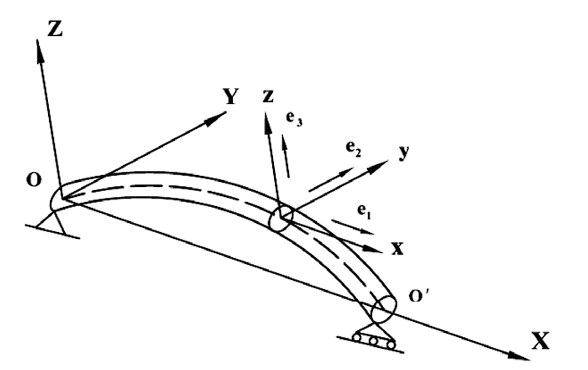



---

## Modelo analítico y análisis cualitativo

La ecuación (27) del artículo no es una sola ecuación, sino un **sistema de dos ecuaciones diferenciales ordinarias y acopladas** que gobiernan la vibración de un modo específico del eje después de aplicar el método de discretización de Galerkin. Representan el modelo matemático del eje rotatorio.:

$$
\begin{aligned}
&(1 + n^2 \pi^2 I_2)\,\ddot{V}
+ c\,\dot{V}
+ n^4 \pi^4\,V
+ 2 n^2 \pi^2 I_2 \Omega\,\dot{W}
+ n^6 \pi^6 (V^3 + V W^2) \\
&\quad
- \left(\frac{3}{8} n^2\pi^2 - \frac{1}{3}n^4\pi^4\right)
\left[V(\dot{V}^2 + \dot{W}^2) + V^2 \ddot{V} + W V \ddot{W}\right] = 0
\\[2em]
&(1 + n^2 \pi^2 I_2)\,\ddot{W}
+ c\,\dot{W}
+ n^4 \pi^4\,W
- 2 n^2 \pi^2 I_2 \Omega\,\dot{V}
+ n^6 \pi^6 (W^3 + V^2 W) \\
&\quad
- \left(\frac{3}{8} n^2\pi^2 - \frac{1}{3}n^4\pi^4\right)
\left[W(\dot{V}^2 + \dot{W}^2) + W^2 \ddot{W} + V W \ddot{V}\right] = 0
\end{aligned}
$$

---

## Forma matricial

$$
A(V, W)
\begin{bmatrix}
\ddot{V} \\
\ddot{W}
\end{bmatrix}
=
B(V, W, \dot{V}, \dot{W})
\quad \text{con} \quad
A(V, W) =
\begin{bmatrix}
(1 + n^2\pi^2 I_2) - K_{nl}V^2 & -K_{nl}V W \\
-K_{nl}V W & (1 + n^2\pi^2 I_2) - K_{nl}W^2
\end{bmatrix}
$$

$$
B(V, W, \dot{V}, \dot{W}) =
\begin{bmatrix}
-c\dot{V} - n^4\pi^4V - 2n^2\pi^2 I_2\Omega\dot{W}
- n^6\pi^6(V^3 + VW^2) + K_{nl}V(\dot{V}^2 + \dot{W}^2) \\
-c\dot{W} - n^4\pi^4W + 2n^2\pi^2 I_2\Omega\dot{V}
- n^6\pi^6(W^3 + V^2W) + K_{nl}W(\dot{V}^2 + \dot{W}^2)
\end{bmatrix}
$$

donde:

$$
K_{nl} = \frac{3}{8}n^2\pi^2 - \frac{1}{3}n^4\pi^4
$$

---

## Significado de los símbolos

| Símbolo | Descripción |
|---------|-------------|
| V, W    | Desplazamientos transversales (coordenadas modales) |
| $\dot{V}, \dot{W}$ | Velocidades transversales |
| $\ddot{V}, \ddot{W}$ | Aceleraciones transversales |
| n       | Número de modo de vibración |
| I₂      | Parámetro de inercia transversal |
| c       | Amortiguamiento modal |
| Ω       | Velocidad angular de giro |
| $K_{nl}$  | Coeficiente de rigidez no lineal efectivo |
| n⁴π⁴   | Rigidez modal lineal |
| 2 n²π² I₂ | Coeficiente giroscópico |
| n⁶π⁶   | Coeficiente de rigidez cúbica geométrica |

* * *


## Modelo computacional y simulaciones
El sistema de ecuaciones se implementa en Python transformándolo a primer orden,
con la función `system_rhs`. Para resolver problemas de valor inicial (PVI),
se emplea el integrador `solve_ivp` de SciPy. Además, se programan rutinas
de graficado para:
- series temporales de V y W,
- diagramas de fase (V vs V̇, W vs Ẇ, V vs W),
- simulaciones interactivas mediante `ipywidgets.interact`.

---

## Análisis de resultados y conclusiones
- El equilibrio trivial (V = W = 0) es estable para ciertos rangos de parámetros,
  pero puede perder estabilidad cuando aumentan Ω o disminuye c.
- El acoplamiento giroscópico desplaza frecuencias naturales y puede inducir
  fenómenos de **whirl** hacia adelante o hacia atrás.
- Los términos no lineales (γ, η) producen rigidez dependiente de la amplitud,
  típica de sistemas Duffing, generando oscilaciones de amplitud limitada.
- Las simulaciones permiten explorar diferentes escenarios y visualizar la
  transición de regímenes estables a inestables.

---

## Referencias
- Hosseini, S. M., & Khadem, S. E. (2009). *Free vibrations analysis of a rotating shaft
  with nonlinearities in curvature and inertia*. Mechanism and Machine Theory, 44(2), 272–288.
- Nayfeh, A. H., & Mook, D. T. (1979). *Nonlinear Oscillations*. Wiley.
- Rao, J. S. (2011). *Rotor Dynamics*. Springer.


Instrucciones de uso
- Ejecuta las celdas en orden.
- Usa la clase **RotatingShaftModel** para variar parámetros y condiciones iniciales.
- Observa cómo cambian las trayectorias en el tiempo y en el espacio de estados.


In [4]:
# Dependencias
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider, IntSlider
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import ipywidgets as widgets

## Definición del sistema (función RHS)
Definimos la función que devuelve las derivadas del sistema de 1er orden.


In [5]:
# @title RotatingShaftModel
class RotatingShaftModel:
    def __init__(self, n=1, I2=0.000625, c=0.05, X=10.0):
        # parámetros físicos / no dimensionales
        self.n = n
        self.I2 = I2      # Inercia Diametral
        self.c = c
        self.X = X
        # constantes derivadas
        self.pi = np.pi
        self.alpha = 1.0 + (n**2)*(self.pi**2)*I2  # coef. masa aparente (1 + n^2 pi^2 I2)
        self.k_lin = (self.pi**4)*(n**4)           # rigidez lineal nondim
        self.n6pi6 = (n**6)*(self.pi**6)           # No lineal
        # Coeficiente C según fórmula
        self.C = (3/8)*(self.pi**2)*(n**2) - (1/3)*(self.pi**4)*(n**4)

    def rhs(self, t, y):
        V, Vd, W, Wd = y
        alpha = self.alpha
        gyro_coeff = 2*(np.pi**2)*(self.n**2)*self.I2*self.X
        k_lin = self.k_lin
        n6pi6 = self.n6pi6
        c = self.c
        C = self.C

        # Construimos el sistema 2x2 para incluir términos con ddot en C
        # A [Vdd, Wdd]^T = b
        A = np.array([
            [alpha + C*V**2, C*V*W],
            [C*V*W, alpha + C*W**2]
        ])
        # Vector b incluyendo todos los términos lineales, giroscópicos y no lineales cúbicos
        b = np.array([
            - c*Vd - k_lin*V - gyro_coeff*Wd - n6pi6*(V**3 + V*W**2) + C*(V*Vd**2 + V*Wd**2),
            - c*Wd - k_lin*W + gyro_coeff*Vd - n6pi6*(W**3 + W*V**2) + C*(W*Vd**2 + W*Wd**2)
        ])

        Vdd, Wdd = np.linalg.solve(A, b)
        return [Vd, Vdd, Wd, Wdd]


    def simulate(self, t_span=(0,200), y0=(0.01,0.0,0.0,0.0), t_eval=None, rtol=1e-8, atol=1e-10):
        if t_eval is None:
            t_eval = np.linspace(t_span[0], t_span[1], 5000)
        sol = solve_ivp(self.rhs, t_span, y0, t_eval=t_eval, rtol=rtol, atol=atol)
        return sol

    def linearized_matrix(self):
        """
        Calcula la matriz linealizada del sistema en el punto de equilibrio (0,0,0,0).
        """
        # La matriz linealizada A se obtiene de las ecuaciones:
        # V'' + c V' + k_lin V + 2 n^2 pi^2 I2 X W' = 0
        # W'' + c W' + k_lin W - 2 n^2 pi^2 I2 X V' = 0
        #
        # Reescribiendo en forma de estado [V, V', W, W']:
        # V' = V'
        # V'' = - c V' - k_lin V - 2 n^2 pi^2 I2 X W'
        # W' = W'
        # W'' = - c W' - k_lin W + 2 n^2 pi^2 I2 X V'

        gyro_coeff = 2*(self.pi**2)*(self.n**2)*self.I2*self.X
        alpha = self.alpha # Use alpha from __init__

        A = np.array([
            [0, 1, 0, 0],
            [-self.k_lin/alpha, -self.c/alpha, 0, -gyro_coeff/alpha],
            [0, 0, 0, 1],
            [0, gyro_coeff/alpha, -self.k_lin/alpha, -self.c/alpha]
        ])
        return A
    # funciones de plot (time history, eigenvalues, phase plot, Poincare, bifurcation)
    def plot_time(self, sol):
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=sol.t, y=sol.y[0], name='V (disp)'))
        fig.add_trace(go.Scatter(x=sol.t, y=sol.y[2], name='W (disp)'))
        fig.update_layout(title='Time history', xaxis_title='t', yaxis_title='disp')
        fig.show()

    def plot_eigenvalues(self):
        """
        Calcula y grafica los valores propios en el plano complejo.
        """
        A = self.linearized_matrix()
        eigvals = np.linalg.eigvals(A)

        fig = go.Figure()

        fig.add_trace(go.Scatter(
            x=np.real(eigvals),
            y=np.imag(eigvals),
            mode='markers+text',
            marker=dict(size=10, color='blue'),
            text=[f"{ev.real:+.3f}{ev.imag:+.3f}j" for ev in eigvals],
            textposition="top center",
            name='Eigenvalues'
        ))

        fig.add_shape(type='line', x0=0, x1=0, y0=-max(abs(np.imag(eigvals)))*1.2,
                      y1=max(abs(np.imag(eigvals)))*1.2, line=dict(color='red', dash='dash'))
        fig.add_shape(type='line', x0=-max(abs(np.real(eigvals)))*1.2,
                      x1=max(abs(np.real(eigvals)))*1.2, y0=0, y1=0, line=dict(color='black', dash='dot'))

        fig.update_layout(
            title='Plano de valores propios del sistema linealizado',
            xaxis_title='Parte real (σ)',
            yaxis_title='Parte imaginaria (ω)',
            xaxis=dict(zeroline=False),
            yaxis=dict(zeroline=False),
            width=700,
            height=600
        )
        fig.show()

    def plot_phase_V(self, sol):
        """Plano de fase V vs dV/dt"""
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=sol.y[0], y=sol.y[1], mode='lines', name='V vs dV/dt'))
        fig.update_layout(
            title='Plano de Fase V vs dV/dt',
            xaxis_title='V', yaxis_title='dV/dt'
        )
        fig.show()

    def plot_phase_W(self, sol):
        """Plano de fase W vs dW/dt"""
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=sol.y[2], y=sol.y[3], mode='lines', name='W vs dW/dt'))
        fig.update_layout(
            title='Plano de Fase W vs dW/dt',
            xaxis_title='W', yaxis_title='dW/dt'
        )
        fig.show()

    def plot_VW_trajectory(self, sol):
        """Trayectoria en espacio de desplazamientos V-W"""
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=sol.y[0], y=sol.y[2], mode='lines', name='Trayectoria V-W'))
        fig.update_layout(
            title='Trayectoria en espacio (V-W)',
            xaxis_title='V', yaxis_title='W'
        )
        fig.show()

    def plot_3d_trajectory(self, sol):
        """Grafica 3D de la trayectoria (V, W, t) con punto inicial destacado"""
        fig = go.Figure()

        # Trayectoria en 3D
        fig.add_trace(go.Scatter3d(
            x=sol.y[0],  # V
            y=sol.y[2],  # W
            z=sol.t,     # tiempo
            mode='lines',
            line=dict(color='blue', width=4),
            name='Trayectoria'
        ))

        # Punto inicial
        fig.add_trace(go.Scatter3d(
            x=[sol.y[0][0]],
            y=[sol.y[2][0]],
            z=[sol.t[0]],
            mode='markers+text',
            marker=dict(size=6, color='red'),
            text=['Inicio'],
            textposition='top center',
            name='Punto inicial'
        ))

        # Opciones del layout
        fig.update_layout(
            title='Trayectoria 3D de la dinámica del eje (V, W, t)',
            scene=dict(
                xaxis_title='V (Desplazamiento)',
                yaxis_title='W (Desplazamiento)',
                zaxis_title='Tiempo'
            ),
            legend=dict(x=0.8, y=0.9)
        )
        fig.show()

    def plot_bifurcation_map(model, param='X', values=None, y0=(0.01, 0, 0, 0),
                         transient=100, sample_window=(100, 200),
                         n_points=5000, points_to_plot=200):
        """
        Genera un diagrama de bifurcación estilo 'mapa logístico' para el sistema no lineal.
        - param: parámetro a barrer (por ejemplo, 'X' = velocidad de rotación Ω)
        - values: lista o array de valores del parámetro
        - y0: condiciones iniciales
        - transient: tiempo que se ignora (transitorio)
        - sample_window: (t_ini, t_fin) ventana donde se extraen datos estables
        - points_to_plot: cuántos puntos de la señal final se grafican por valor de Ω
        """
        if values is None:
            values = np.linspace(0, 50, 300)  # rango de velocidades

        X_vals = []
        V_vals = []

        for val in values:
            setattr(model, param, val)
            sol = model.simulate(t_span=(0, sample_window[1]), y0=y0,
                                t_eval=np.linspace(0, sample_window[1], n_points))
            mask = sol.t > sample_window[0]
            V_sample = sol.y[0][mask]

            # tomamos solo los últimos puntos (para eliminar transitorio)
            if len(V_sample) > points_to_plot:
                V_plot = V_sample[-points_to_plot:]
            else:
                V_plot = V_sample

            X_vals.extend([val] * len(V_plot))
            V_vals.extend(V_plot)

        # --- GRAFICAR ---
        plt.figure(figsize=(12, 7))
        plt.plot(X_vals, V_vals, ',k', alpha=0.4)  # puntos negros finos
        plt.title("Diagrama de Bifurcación del Eje Rotatorio")
        plt.xlabel("Velocidad de rotación Ω")
        plt.ylabel("Desplazamiento V en el atractor")
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.show()


In [15]:
model =RotatingShaftModel(n=1, I2=0.000625, c=0.05, X=10.0)
# Simular
sol = model.simulate(t_span=(0,100), y0=(0.01,0,0,0))

# Nuevas gráficas
model.plot_time(sol)          # Respuesta en el tiempo
model.plot_eigenvalues()      # Plano complejo de valores propios
model.plot_phase_V(sol)       # Plano de fase V vs dV/dt
model.plot_phase_W(sol)       # Plano de fase W vs dW/dt
model.plot_VW_trajectory(sol) # Trayectoria V-W
model.plot_3d_trajectory(sol) # Trayectoria en 3D

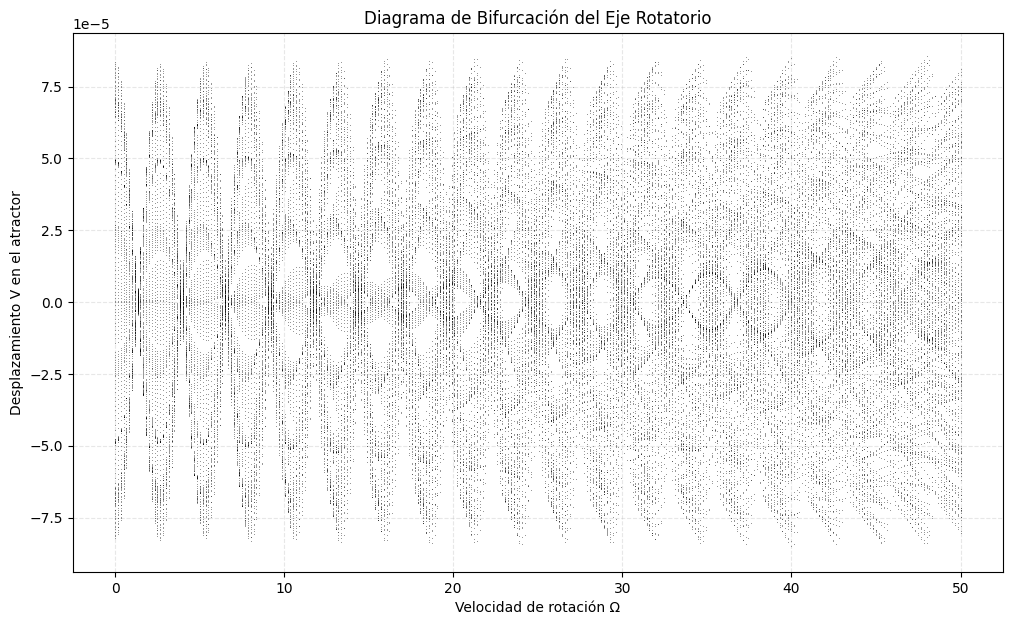

In [ ]:
model.plot_bifurcation_map()  # n=1, I2=0.000625, c=0.05, X=10.0

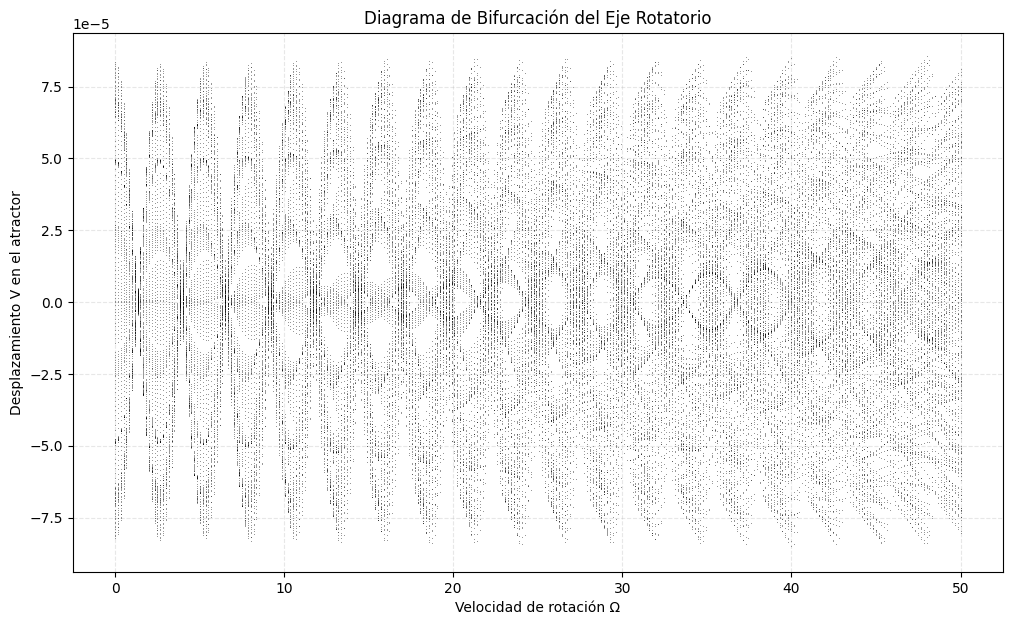

In [ ]:
model.plot_bifurcation_map()  # n=1, I2=0.000625, c=0.05, X=1000.0

Observaciones rápidas:
- c=0.001: Vibración casi perpetua
- c=0.05: Decaimiento moderado (como en el artículo)
- c=0.2: Decaimiento rápido
- Si todos los autovalores tienen parte real negativa, el equilibrio es linealmente estable.
- En presencia de giro (Omega) los términos giroscópicos pueden desplazar modos y producir acoplamientos
  que generan oscilaciones con crecimiento o batido según otros parámetros.
